# __Part 6 - Reinforcement Learning__


### __Reinforcement Learning__

e.g. training agents (an AI)  interact with environments like games. 

Rather than feeding our machine learning model millions of examples we __let our model come up with its own examples by exploring an environment.__

The concept is simple. __Humans learn by exploring and learning from mistakes and past experiences so let's have our computer do the same.__



### __Terminology__
Before we dive into explaining reinforcement learning we need to define a few key pieces of terminology.

- **Environment** In reinforcement learning tasks we have a notion of the environment. __This is what our *agent* will explore.__

  - __The environment is essentially defined as the number of states & the number of actions in the way that the agent can interact with given states.__

  - An example of an environment in the case of training an AI to play  a game of mario would be __the level we are training the agent on.__

- __**Agent** is an entity that is exploring the environment.__ 
  - Our agent will interact and take different actions within the environment. 
  - In our mario example the mario character within the game would be our agent. 

- **State** : our agent will always be in what we call a *state*. __The state simply tells us about the status of the agent (where you are).__
  - The most __common example of a state is the location of the agent within the environment.__
  - __Moving locations__ would __change the agents state__.

- **Action** : __any interaction between the agent and environment would be considered an action.__ 
  - For example, __moving to the left or jumping would be an action.__ 
  - An action may or may not change the current *state* of the agent.
  - In fact, the act of doing nothing is an action as well! e.g. the action of not pressing a key if we are using our mario example.

- **Reward** : __every action that our agent takes will result in a reward of some magnitude (positive or negative).__

  - The __goal of our agent__ will be __to maximize its reward in an environment.__ 
  - Sometimes the reward will be clear, for example if an agent performs an __action which increases their score in the environment__ we could say they've received a __positive reward__. 
  - If the agent were to perform an __action which results in them losing score or possibly dying in the environment__ then they would receive a __negative reward.__

\

__The most important part of reinforcement learning is determing how to reward the agent.__

After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropriately such that it reaches the desired goal.



![Fig](https://www.guru99.com/images/1/082319_0514_Reinforceme2.png)

## __Q-Learning__
Now that we have a vague idea of how reinforcement learning works it's time to talk about a specific technique in reinforcement learning called *Q-Learning*.

__Q-Learning__ is a simple yet quite powerful technique in machine learning that __involves learning a matrix of action-reward values.__ 

- This matrix is often refered to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions).

- Each value at matrix[n, m] represents the agents expected reward given they are in state n and take action m. 

- __The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take at each state.__

- The idea is that __after a successful training/learning of this Q-Table/matrix we can determine the action an agent should take in any state__ by looking at that states row in the matrix and __taking the maximium value column as the action__.

**Consider this example.**

Let's say A1-A4 are the possible actions and we have 3 states represented by each row (state 1 - state 3).

   -  | A1  | A2  | A3  | A4  |
 :--: |:--: |:--: |:--: |:--: |
  S1  |  0  |  0  | 10  |  5  |
  S2  |  5  | 10  |  0  |  0  |
  S3  | 10  |  5  |  0  |  0  |


__Q-values = The numbers inside Q-matrix which represent what the predicted reward will be with specific action (column : A1-A4) while it is in particular state (row : S1-S3).__

If that was our Q-Table/matrix then the following would be the prefered actions in each state.

> State 1: A3

> State 2: A2

> State 3: A1

We can see that this is because the values in each of those columns are the highest for those states!


![alt text](https://i.vas3k.ru/7wa.jpg)



### __Learning the Q-Table__

Now how do we create this table and find those values. 

Well this is where we will discuss how the Q-Learning algorithm updates the values in our Q-Table. 

I'll start by noting that our Q-Table starts of with all 0 values. This is because the agent has yet to learn anything about the environment. 

Our agent learns by exploring the environment and observing the outcome/reward from each action it takes in each state. But how does it know what action to take in each state? There are two ways that our agent can decide on which action to take.
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Near the beginning of our agents learning it will mostly take random actions in order to explore the environment and enter many different states. 

As it starts to explore more of the environment it will start to gradually rely more on it's learned values (Q-Table) to take actions. 

This means that as our agent explores more of the environment it will develop a better understanding and start to take "correct" or better actions more often. It's important that the agent has a good balance of taking random actions and using learned values to ensure it does get trapped in a local maximum. 

After each new action our agent wil record the new state (if any) that it has entered and the reward that it recieved from taking that action. These values will be used to update the Q-Table. The agent will stop taking new actions only once a certain time limit is reached or it has acheived the goal or reached the end of the environment. 

\

### __Updating Q-Values__
The formula for updating the Q-Table after each action is as follows:
> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

- $\alpha$ stands for the **Learning Rate**
  - __It is essentially how much we update each cell value__

- $\gamma$ stands for the **Discount Factor**
  - __It is defining the balance between finding really good reward in our current state and finding the rewards in the future state.__ 
  - __The more value, the more looking reward at the future__

\

#### __Learning Rate__ $\alpha$

__The learning rate $\alpha$__ __is a numeric constant that defines how much change is permitted on each QTable update.__ 

  - __High learning rate__ means that __each update will introduce a large change to the current state-action value.__

  -__Small learning rate__ means that __each update has a more subtle change.__ 
  
  - __Modifying the learning rate__ will __change__ how the __agent explores the environment and how quickly it determines the final values in the QTable__.

\

#### __Discount Factor $\gamma$__

__Discount factor ($\gamma$)__ is used to balance how much focus is put on the current and future reward. 

  - __High discount factor__ means that __future rewards__ will be considered __more heavily.__

\

To perform updates on this table we will __let the agent explore the environment__ for a certain period of time __and use each of its actions to make an update__. Slowly we should __start to notice the agent learning and choosing better actions.__ 

\



## __Q-Learning Example__

For this example we will use the Q-Learning algorithm to train an agent to navigate a popular environment from the [Open AI Gym](https://gym.openai.com/). The Open AI Gym was developed so programmers could practice machine learning using unique environments. Intersting fact, Elon Musk is one of the founders of OpenAI!

Let's start by looking at what Open AI Gym is. 

In [ ]:
import gym   # all you have to do to import and use open ai gym!

Once you import gym you can load an environment using the line ```gym.make("environment")```.

In [ ]:
env = gym.make('FrozenLake-v1')  # we are going to use the FrozenLake environment

There are a few other commands that can be used to interact and get information about the environment.

In [ ]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [ ]:
env.reset()  # reset environment to default state

0

In [ ]:
action = env.action_space.sample()  # get a random action 

In [ ]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [ ]:
# env.render()   # render the GUI for the environment 

###__Frozen Lake environment__
Now that we have a basic understanding of how the gym environment works it's time to discuss the specific problem we will be solving.

The environment we loaded above ```FrozenLake-v0``` is one of the simplest environments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the environment above to see an example).

There are:
- 16 states (one for each square) 
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)



###__Building the Q-Table__
The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

###__Constants__
As we discussed we need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

In [ ]:
EPISODES = 2000 # how many times to run the environment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96          # discount factor

###__Picking an Action__
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the environment.

In [ ]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

###__Updating Q Values__'
The code below implements the formula discussed above.

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

###__Putting it Together__
Now that we know how to do some basic things we can combine these together to create our Q-Learning algorithm,

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the environment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [ ]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()
    
    if np.random.uniform(0, 1) < epsilon: # Take action
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action) # After action, store in next_state and reward

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[2.89199936e-01 1.00042470e-02 7.49341365e-03 9.69907356e-03]
 [1.31018159e-03 3.53624695e-03 3.54446770e-03 1.96329889e-01]
 [2.33208278e-03 1.41894768e-01 2.07001713e-03 2.89800191e-03]
 [2.59299981e-03 2.29818435e-03 1.47272856e-03 9.62339446e-02]
 [3.23789212e-01 8.62636978e-03 2.86358403e-03 7.77106627e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.08474562e-06 1.83057965e-04 1.38604496e-05 5.21872960e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.66293665e-03 6.89279322e-03 6.74331493e-03 5.02662554e-01]
 [6.18177767e-03 7.84156227e-01 1.96142754e-03 1.36898264e-03]
 [1.55795639e-01 2.53732628e-04 1.06844196e-03 3.56201285e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.22547379e-01 3.07935424e-02 7.70138277e-01 1.28239123e-01]
 [1.87373258e-01 8.04031829e-01 7.54530118e-02 1.38967880e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

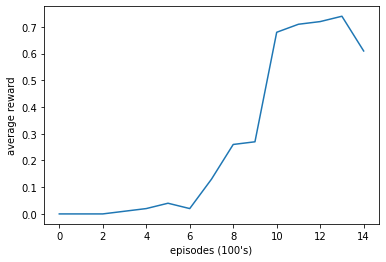

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)') # how many times to run the environment from the beginning
plt.show()

##Sources
1. Violante, Andre. “Simple Reinforcement Learning: Q-Learning.” Medium, Towards Data Science, 1 July 2019, https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56.

2. Openai. “Openai/Gym.” GitHub, https://github.com/openai/gym/wiki/FrozenLake-v0.